Pretrain on different learning rates with the optimal setting in the pilot study. In the meantime, the test data (cores PS75-056-1, LV28-44-3, SO264-69-2) is exculded from both the training and validation data (`build_data.py`). The updated annotation file is `data/info_20231225.csv` and the spectra are stored in `data/pretrain`. 

```
ViT model: base
Constant learning rate: 1e-5
Optimizer: AdamW (betas=(0.9, 0.95)) 
Clips gradient norm
Data pre-processing: spectrum-wise standardization
Patch size: 16
Mask ratio: 0.75
Batch size: 256
Epochs: 30 (to reduce time)
```

In [1]:
import pandas as pd

lr_df = pd.read_csv('results/test_lr_20231225.csv')
lr_df

,lr,min_val_loss
0,1.000000e-03,0.889172
1,1.000000e-04,0.034192
2,1.000000e-05,0.014337
3,1.000000e-06,0.035595
4,1.000000e-07,0.070993


Text(0, 0.5, 'Minimum validation loss in 30 epochs')

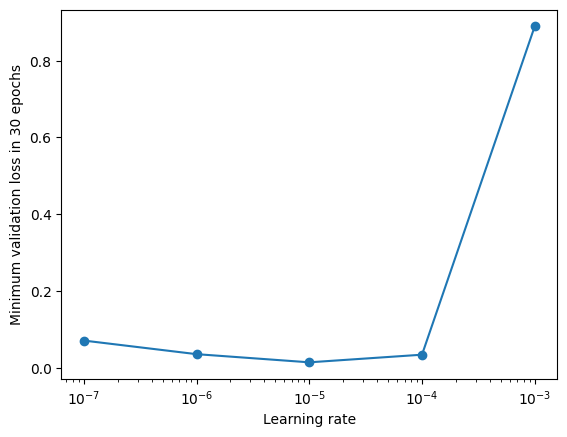

In [7]:
import matplotlib.pyplot as plt
plt.plot(lr_df.lr, lr_df.min_val_loss, 'o-')
plt.xscale('log')
plt.xlabel('Learning rate')
plt.ylabel('Minimum validation loss in 30 epochs')

________________________________________________________________________________
Learning rate: 0.001


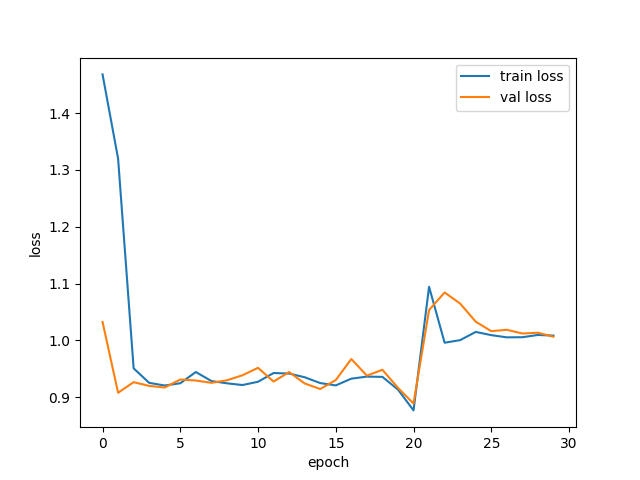

________________________________________________________________________________
Learning rate: 0.0001


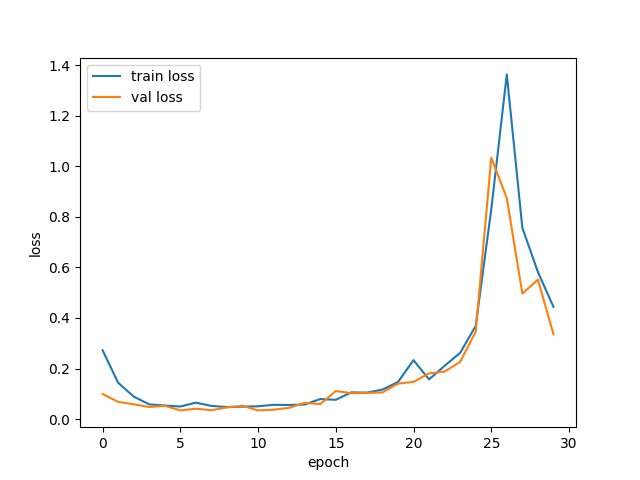

________________________________________________________________________________
Learning rate: 1e-05


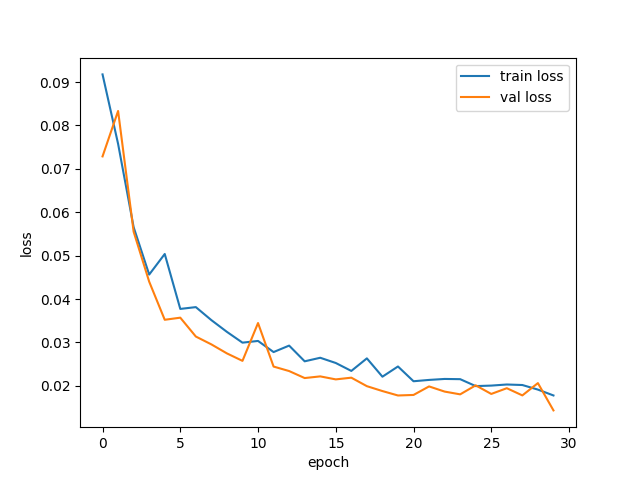

________________________________________________________________________________
Learning rate: 1e-06


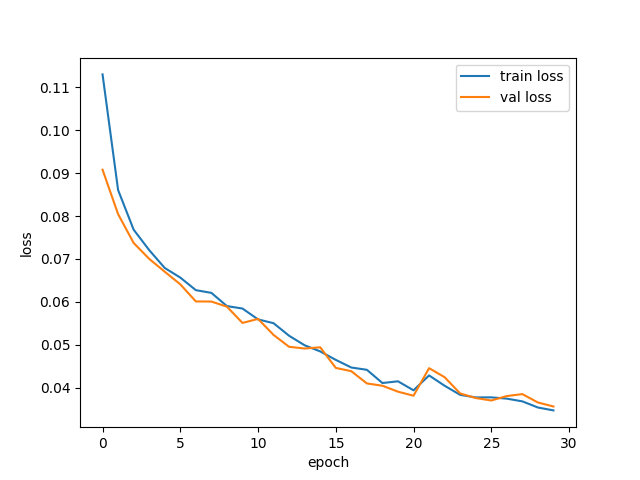

________________________________________________________________________________
Learning rate: 1e-07


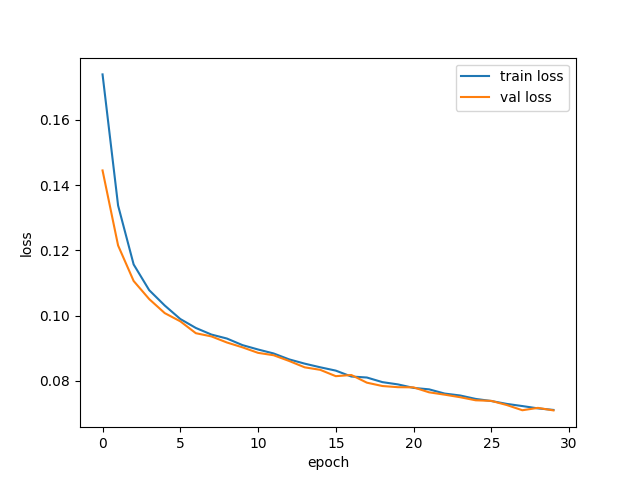

In [8]:
# display a png image
from IPython.display import Image, display
for lr in lr_df['lr']:
    img = Image(filename=f'results/loss_{lr}_20231225.png')
    print('_'*80)
    print(f'Learning rate: {lr}')
    display(img)

The smaller learning rate, the stabler loss curve. The lrs larger than 1e-6 start to have kinky loss or even increasing loss after several epoch. It shows the smaller lr is required after the several epochs. Simply using small but fixed lr is more time consuming, i.e. the model converges slower. Therefore, I reckon the scheduling lr that has warming up and decaying is necessary. The MAE also includes the lr scheduling to their training.

Yu-Wen says there is no strict rule or recommendation for choosing lr scheduling. Even though many of the proposals has their theoretical support, the performance is not always better in different practices. Therefore, let's try and error on few default/famous lr scheduling methods.

In addition, after discussing with Yu-Wen, I will train our model from scratch with the optimal setting in the pilot study, instead of inheritating the weights from the pilot optimal model. The reason is that the pilot model is only trained on 1 core (no clear representative), which makes the logic tricky. It may lead to more complicated discussion, so I better simply train from the scratch with the whole datasset (except the test data).